In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
%pylab inline
figsize(12, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def massage_data(run):
    # Change time into time values
    run.linuxtime = run.linuxtime.apply(datetime.datetime.fromtimestamp)
    
    run.set_index(run.linuxtime, drop=True, inplace=True)
    del run["linuxtime"]
    for col in run:
        run[col].index = run.index
        
    # Get rid of some nonsense
    run.rpm = run.ds_rpm.apply(lambda x: x if x < 5000 else np.nan)
    
    # Interpolate what we can
    try:
        run.interpolate(method='time')
    except TypeError:
        pass
    
    # Fill forward for other values
    run.fillna(method='pad', inplace=True)
    # fill backward for initial values
    run.fillna(method='bfill', inplace=True)

    return run

In [3]:
from glob import glob
runs = []
for file in glob("../../Analysis/logs/*.csv"):
    run = pd.read_csv(file)
    run = massage_data(run)
    runs.append(run)

In [4]:
total_run = None
for run in runs:
    if total_run is None:
        total_run = run
    else:
        total_run = total_run.append(run)
total_run = total_run["2016-07-15":"2016-07-21"]

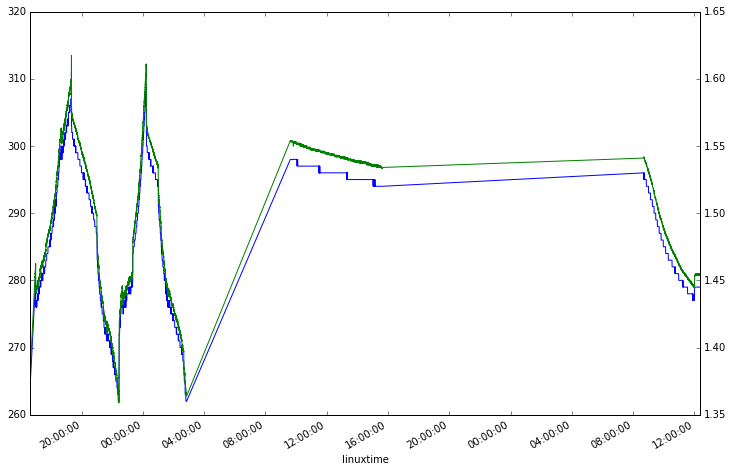

In [5]:
total_run.ds_300v_volt.plot()
total_run.an_300v_volt.plot(secondary_y=True)

In [6]:
def fit_and_plot(x, y):
    fit = np.polyfit(x, y, 1)
    plt.plot(x, y, ',')
    plt.plot(x, np.poly1d(fit)(x))
    return fit

y = 191.54x + 0.40


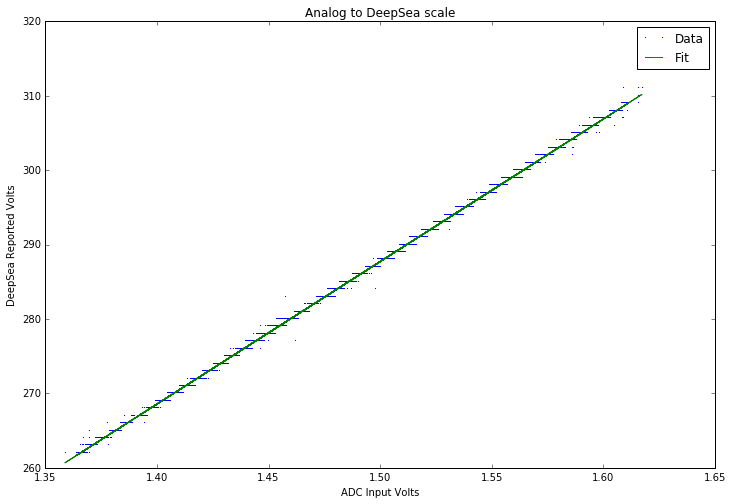

In [7]:
fit = fit_and_plot(total_run.an_300v_volt, total_run.ds_300v_volt)
plt.title("Analog to DeepSea scale")
plt.xlabel("ADC Input Volts")
plt.ylabel("DeepSea Reported Volts")
plt.legend(["Data", 'Fit'])
print("y = {:.2f}x + {:.2f}".format(*fit))

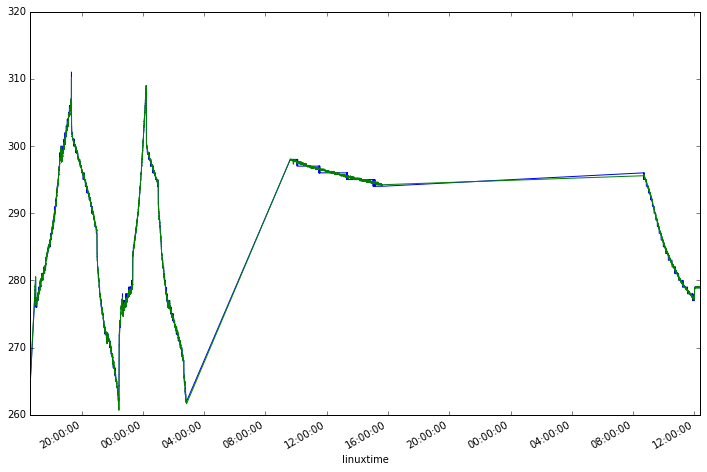

In [9]:
fit_func = np.poly1d(fit)
total_run.an_300v_volt = fit_func(total_run.an_300v_volt)
total_run.ds_300v_volt.plot()
total_run.an_300v_volt.plot()